# Programming for Chemistry 2025/2026 @ UniMI

![logo](logo_small.png "Logo")

## Lecture 13: Matplotlib

**Matplotlib** is a low level graph plotting library in python that serves as a visualization utility. It is mostly used to visualize **NumPy** arrays. It is not interactive! This means that to change the appearance of your plots, you must write python code. However, if you have to produce the same kind of plots from different data, Matplotlib is very useful.

Matplotlib can used in two ways:
1. using it's own classes through Object-Oriented Programming
2. using a procedural way, which is more similar to MatLab(R) plot commands

In addition to Matplotlib there are other graphical frameworks: seaborn, plotly, vtk, ...

## 1. Getting started with Matplotlib
The Matplotlib package can be imported by ``import matplotlib``. In addition the ``pyplot`` submodule is the one we will use most. To save some typing, we will import it `as plt`.

Since Matplotlib depends heavily on NumPy, we need also to ``import numpy as np``.

Matplotlib should be already installed in Anaconda. Under Linux/WSL you can install the official packages from your distribution. Otherwise, you can install any version of NumPy in a virtual environment using `pip` or `conda`.

Typically one does:
```bash
conda create myenvinronment
conda activate myenvironment
conda install matplotlib
```
or
```bash
python -m venv myenvironment
. myenvironment/bin/activate
pip install matplotlib
```

In [1]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

print(matplotlib.__version__)

3.6.3


### 1.1 First plot with Matplotlib
To work with Matplotlib, you need to create a **figure** with `plt.figure()`, then **add plots** to it (i.e. with `plt.plot()`, finally **show** it with `plt.show()`.

Here is a basic example. The `plt.plot()` function requires two arrays of same length (one for the *x*, one for the *y* coordinates) and connects the points with a line.

In [2]:
x = np.arange(0, 10)
y = np.random.random(10)

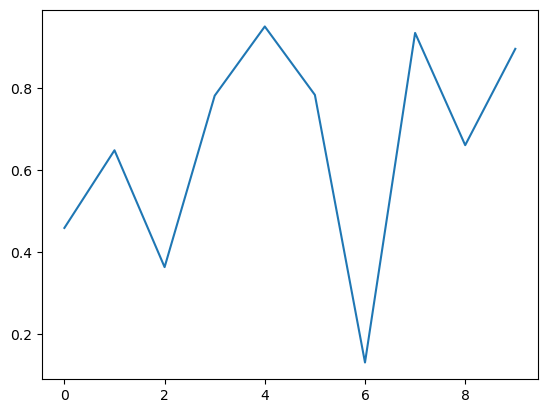

In [3]:
fig = plt.figure()
plt.plot(x, y)
plt.show()

The `plt.figure()` has many optional arguments. The most useful are `figsize=(w,h)` and `dpi`:

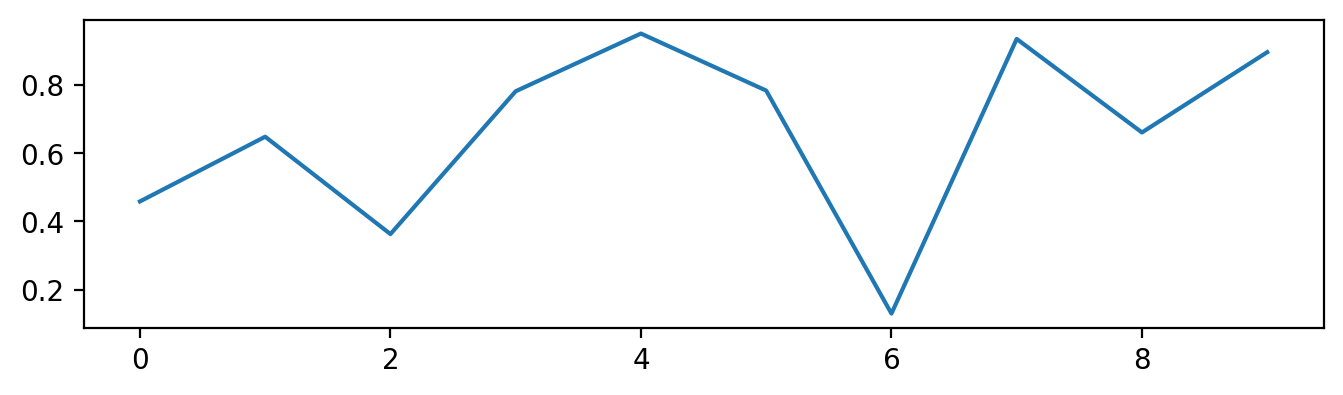

In [4]:
fig = plt.figure(figsize=(8,2), dpi=200)
plt.plot(x, y)
plt.show()

The `plt.plot()` accepts optional arguments as well. The mose useful are `color`, `linewidth`, `linestyle`, `marker`, `markersize`, `label`. The latter is the label for the legend of the plot (`plt.legend()`):

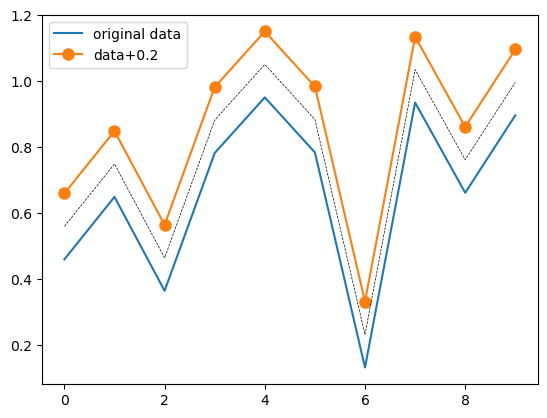

In [5]:
fig = plt.figure()

plt.plot(x, y, label='original data')
plt.plot(x, y+0.2, marker='o', markersize=8, label='data+0.2')
plt.plot(x, y+0.1, color='black', linewidth=0.5, linestyle='dashed')         

plt.legend()  # show the legend
plt.show()

Finally, you can add title and axis labels with `plt.title()`, `plt.xlabel()`, `plt.ylabel()`. `plt.grid()` shows a grid. In addition to showing the plot in the Jupyter notebook, you can save it to file in PDF or graphics formats with `plt.savefig()`.

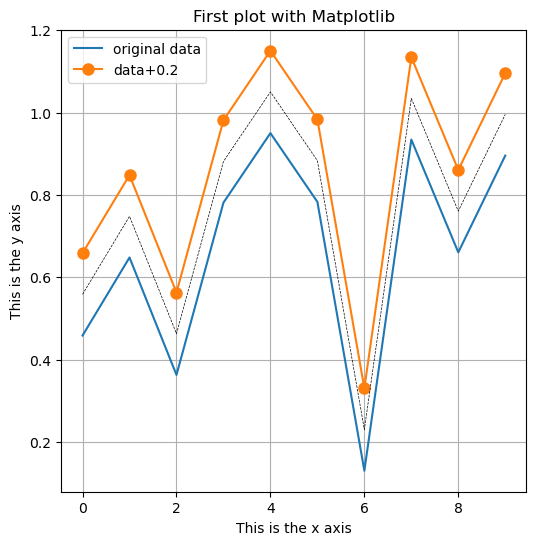

In [6]:
fig = plt.figure(figsize=(6,6))

plt.plot(x, y, label='original data')
plt.plot(x, y+0.2, marker='o', markersize=8, label='data+0.2')
plt.plot(x, y+0.1, color='black', linewidth=0.5, linestyle='dashed')

plt.title('First plot with Matplotlib')
plt.xlabel('This is the x axis')
plt.ylabel('This is the y axis')
plt.legend()
plt.grid()

plt.savefig('first_plot.pdf')
plt.show()

### 1.2 Plotting functions
You can't really plot functions in Matplotlib. However, you can to create a ndarray `x` with `np.linspace()`, then evaluate the function on the array, using the mathematical functions from `numpy`. You can adjust the plot ranges with `plt.xlim()` and `plt.ylim()`. You can draw vertical and horizontal lines with `plt.axvline()` and `plt.axhline()`:

In [7]:
x = np.linspace(-10, 10, 1000)
sinx = np.sin(x)
cosx = np.cos(x)
tanx = np.tan(x)

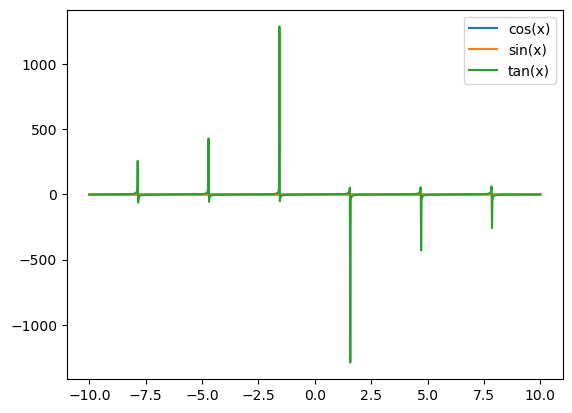

In [8]:
fig = plt.figure()

plt.plot(x, cosx, label='cos(x)')
plt.plot(x, sinx, label='sin(x)')
plt.plot(x, tanx, label='tan(x)')

plt.legend()
plt.show()

Let's improve the appearance of this plot:

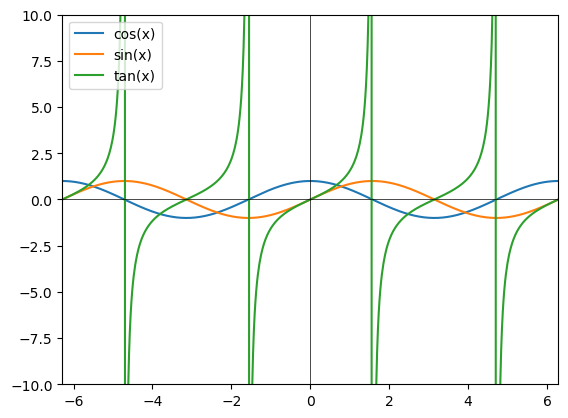

In [9]:
fig = plt.figure()

plt.plot(x, cosx, label='cos(x)')
plt.plot(x, sinx, label='sin(x)')
plt.plot(x, tanx, label='tan(x)')

plt.xlim(-2*np.pi, 2*np.pi)
plt.ylim(-10, 10)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.legend(loc=2)
plt.show()

### Excercise: polynomial fitting
The NumPy package has special functions to handle polynomials. In particular the `np.polyfit()` function fits a polynomial to data, `np.polyval()` evaluates a polynomial on a series of points.

Let's fit and plot the calculated equation of state (energy vs volume) of CeO$_2$ from the file `volume.dat`.

In [10]:
# read the data from volume.dat
latt, energy = np.loadtxt('volume.dat', unpack=True)
volume = latt**3 / 4    # volume of the fcc primitive cell

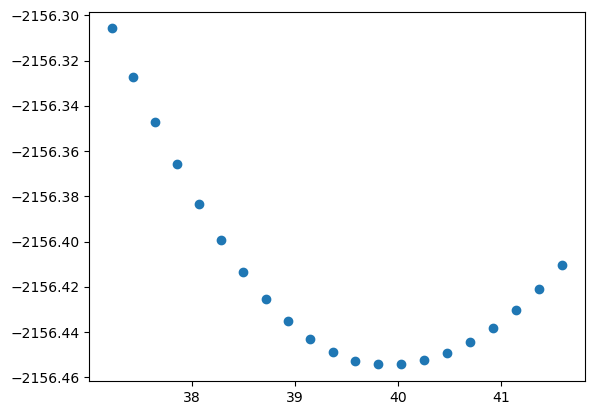

In [11]:
# plot the points
fig = plt.figure()
plt.scatter(volume, energy)    # like plt.plot() but doesn't draw lines
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

In [18]:
# fit a polynomial of degree 'deg'
poly = np.polyfit(volume, energy, deg=6)
print(poly)

[ 4.04328558e-06 -7.84757237e-04  6.00293956e-02 -2.22599780e+00
  3.78376072e+01 -1.49043345e+02 -4.14844269e+03]


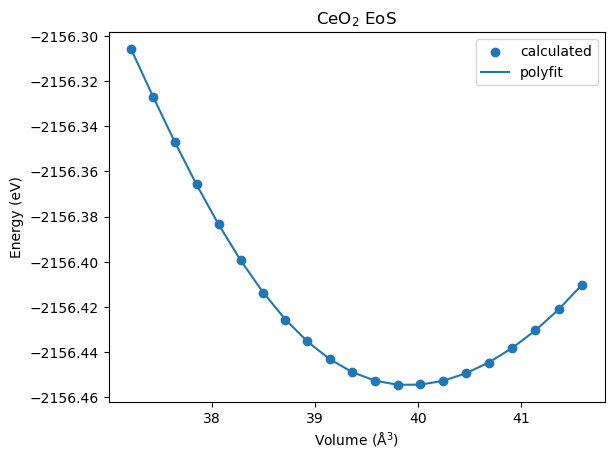

In [19]:
# plot the points and the polynomial
fig = plt.figure()

plt.scatter(volume, energy, label='calculated')
plt.plot(volume, np.polyval(poly,volume), label='polyfit')

plt.xlabel('Volume (Å$^3$)')
plt.ylabel('Energy (eV)')
plt.title('CeO$_2$ EoS')
plt.legend()
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

### 1.3 Bar plots and histograms
Let's plot properly the distribution of the results of throwing two dice, from a previous lecture, using the `plt.bar()` function.

In [22]:
import random

prob = np.zeros(11)   # from 0 to 10 included
ntrials = 10000

for i in range(ntrials):
    a = random.randint(0, 5)
    b = random.randint(0, 5)
    prob[a+b] += 1
    
prob = prob / ntrials
print(prob)

[0.0277 0.0574 0.0825 0.1095 0.1385 0.1675 0.1359 0.1101 0.0846 0.0593
 0.027 ]


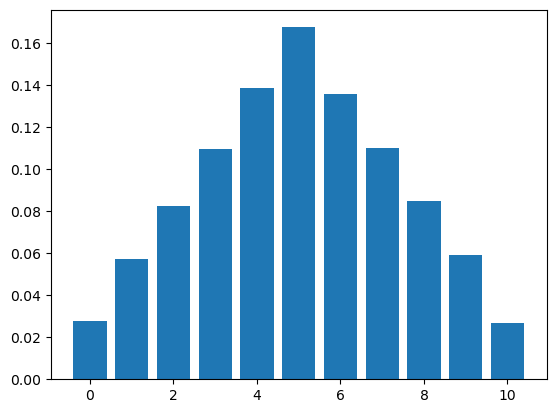

In [23]:
fig = plt.figure()
x = np.arange(0, 11)
plt.bar(x, prob)
plt.show()

The `plt.histo(x, bins=...)` takes care of plotting the histogram of the `x` array. Let's plot the distribution of the formation enthalpy of all crystal polymorphs of CrSb$_2$ found by USPEX, a code for **Crystal Structure Prediction (CSP)**:

In [24]:
enthalpies = np.loadtxt('enthalpies_complete.dat', usecols=2)

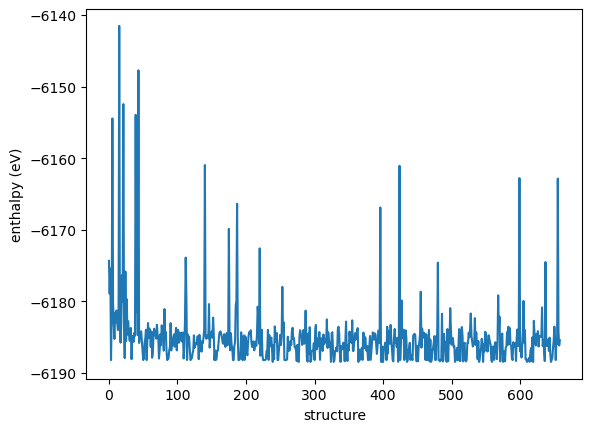

In [25]:
# simply plot the enthalpies
fig = plt.figure()
plt.plot(enthalpies)

plt.xlabel('structure')
plt.ylabel('enthalpy (eV)')
plt.show()

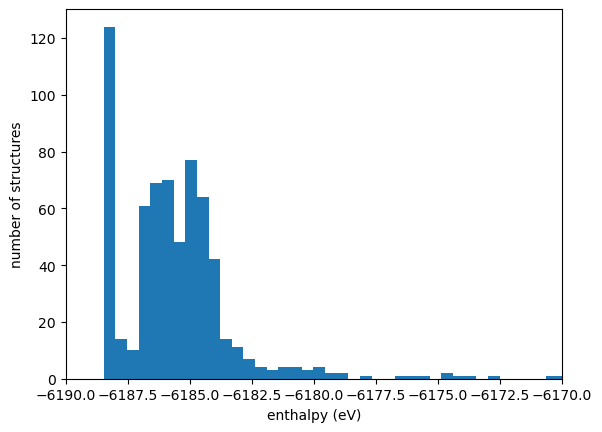

In [31]:
# plot the histogram of the enthalpies
fig = plt.figure()
plt.hist(enthalpies, bins=100)

plt.ylabel('number of structures')
plt.xlabel('enthalpy (eV)')
plt.xlim(-6190, -6170)
plt.show()

## 2. NumPy+Matplolib exercise: 1d Schrödinger equation

The purpose of this exercise is to solve the one dimensional Schrödinger equation for a simple potential (i.e. the harmonic oscillator), using the finite-difference (FD) method and plot the eigenfunctions.

### 2.1 The Schrödinger equation
We work in atomic units such that $\hbar = m = e = 1$. In this units the Schrödinger equation is:

$-\frac{1}{2} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E \psi(x)$

for the harmonic oscillator: $V(x) = \frac{1}{2} x^2$. The corresponding eigenvalues are $E_n = n+\frac{1}{2}$, with $n=0,..,+\infty$.

### 2.2 Discretization
The first step is to take an interval $x \in [-L,L]$ and discretize it in small intervals of size $\Delta x$.

In [72]:
L = 10.0
npoints = 1001

x = np.linspace(-L, L, npoints)
dx = x[1] - x[0]
dx = 2*L / (npoints-1)

### 2.3 The kinetic energy
Next we define $\psi_i \equiv \psi(x_i)$. It is easy to show that using FD the second derivative of $\psi$ is:

$\frac{d^2\psi(x_i)}{dx^2} \simeq \frac{1}{(\Delta x)^2} [ \psi(x_i+\Delta x) - 2\psi(x_i) + \psi(x_i-\Delta x) ] = 
\frac{1}{(\Delta x)^2} [\psi_{i+1} -2\psi_i + \psi_{i-1}]$

Then, if $\psi$ is a one-dimensional array, the second derivative is matrix $A$ defined as:
$D_{i,i} = \frac{-2}{(\Delta x)^2}$ and $D_{i,i+1} = D_{i,i+1} = \frac{1}{(\Delta x)^2}$.

Build the matrix $D$ using a NumPy *ndarray*.

In [73]:
D = np.zeros((npoints, npoints))

for i in range(npoints):
    D[i,i] = -2.0
    
    if i < npoints-1:
        D[i,i+1] = 1.0

    if i > 0:
        D[i,i-1] = 1.0

D = D / dx**2
print(D)

[[-5000.  2500.     0. ...     0.     0.     0.]
 [ 2500. -5000.  2500. ...     0.     0.     0.]
 [    0.  2500. -5000. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ... -5000.  2500.     0.]
 [    0.     0.     0. ...  2500. -5000.  2500.]
 [    0.     0.     0. ...     0.  2500. -5000.]]


###  2.4 The Hamiltonian
Given the matrix $A$ and the fact that the potential is a diagonal matrix, build the Hamiltonian $H = -\frac{1}{2} D + V$. Use `np.diag(V)` to construct a square matrix with the vector `V` on the diagonal.

Diagonalize $H$ and print the first six eigenvalues.

In [74]:
V = 0.5*x*x
#print(np.diag(V))
H = -0.5*D + np.diag(V)
print(H)

[[ 2550.     -1250.         0.     ...     0.         0.         0.    ]
 [-1250.      2549.8002 -1250.     ...     0.         0.         0.    ]
 [    0.     -1250.      2549.6008 ...     0.         0.         0.    ]
 ...
 [    0.         0.         0.     ...  2549.6008 -1250.         0.    ]
 [    0.         0.         0.     ... -1250.      2549.8002 -1250.    ]
 [    0.         0.         0.     ...     0.     -1250.      2550.    ]]


In [75]:
V = 0.5*x*x
H = -0.5*D
for i in range(npoints):
    H[i,i] = H[i,i] + V[i]
print(H)

[[ 2550.     -1250.        -0.     ...    -0.        -0.        -0.    ]
 [-1250.      2549.8002 -1250.     ...    -0.        -0.        -0.    ]
 [   -0.     -1250.      2549.6008 ...    -0.        -0.        -0.    ]
 ...
 [   -0.        -0.        -0.     ...  2549.6008 -1250.        -0.    ]
 [   -0.        -0.        -0.     ... -1250.      2549.8002 -1250.    ]
 [   -0.        -0.        -0.     ...    -0.     -1250.      2550.    ]]


In [76]:
eigs, eigv = np.linalg.eigh(H)
print(eigs[0:6])

[0.4999875  1.4999375  2.49983749 3.49968747 4.49948744 5.49923739]


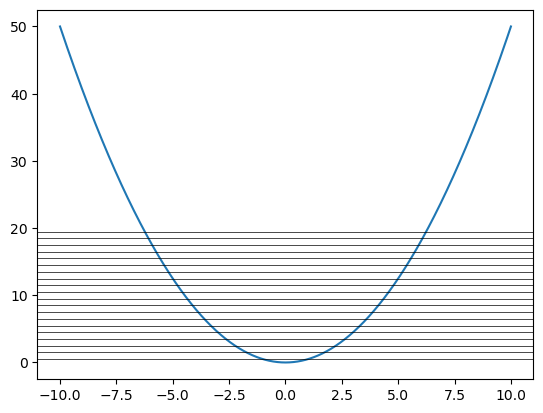

In [77]:
fig = plt.figure()
plt.plot(x, V)
for i in range(20):
    plt.axhline(eigs[i], color='black', linewidth=0.5)
plt.show()

### 2.5 Plot the first few wavefunctions and their density

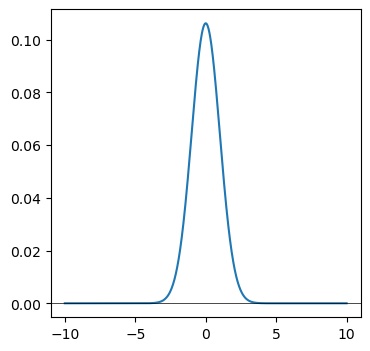

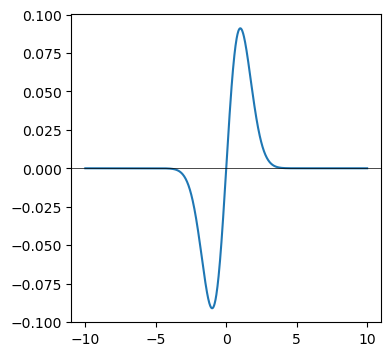

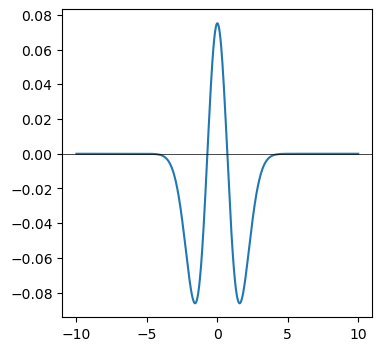

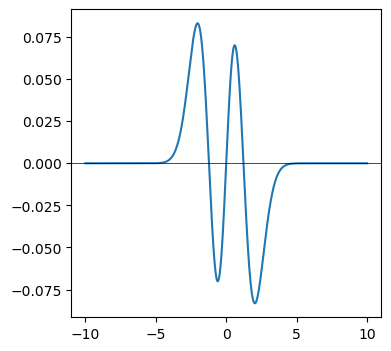

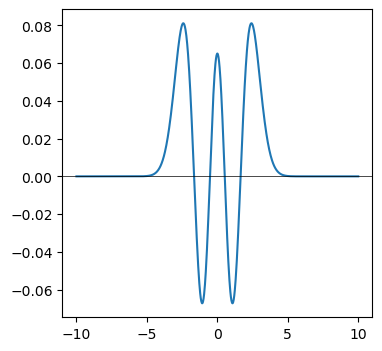

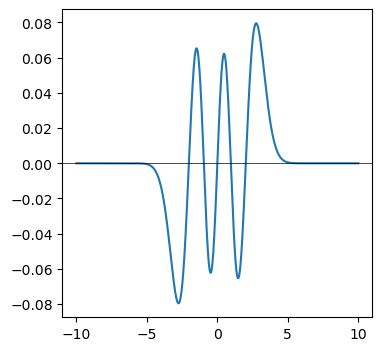

In [64]:
for i in range(6):
    fig = plt.figure(figsize=(4,4))
    plt.plot(x, eigv[:,i])
    plt.axhline(0, color='black', linewidth=0.5)
    plt.show()

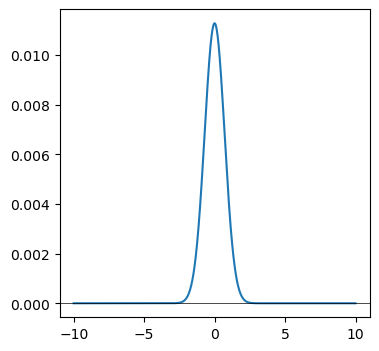

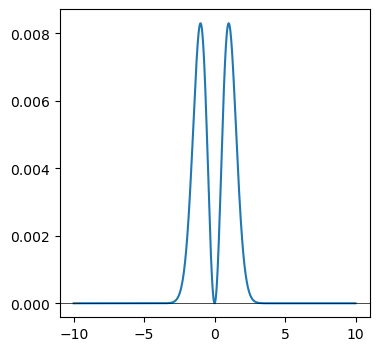

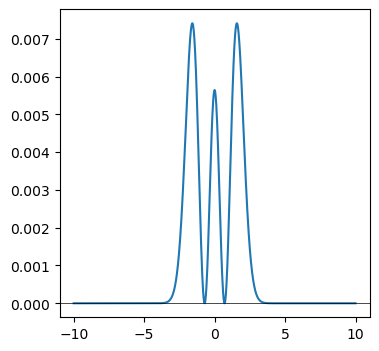

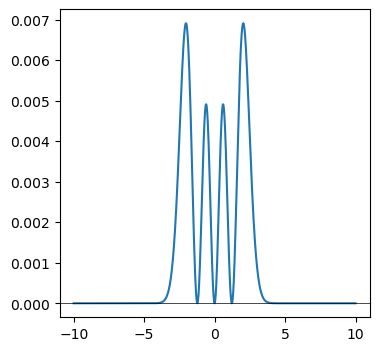

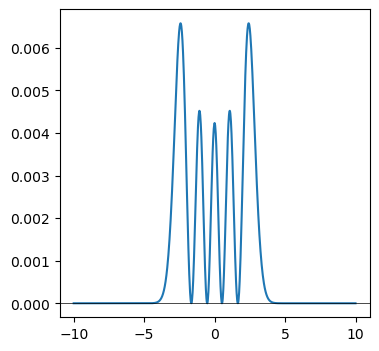

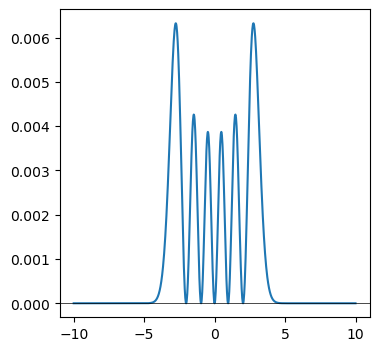

In [65]:
for i in range(6):
    fig = plt.figure(figsize=(4,4))
    plt.plot(x, eigv[:,i]**2)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.show()

### 2.6 Do the same for a symmetric/asymmetric double well potential
For instance $V=-\frac{1}{2}x^2 + \alpha x^3 + \beta x^4$ with $\alpha,\beta$ small positive parameters.

In [88]:
alpha = 0.005
beta = 0.01

V = -0.5*x*x + alpha*x**3 + beta*x**4
H = -0.5*D + np.diag(V)
    
eigs, eigv = np.linalg.eigh(H)
print(eigs[0:10])

[-6.2005554  -4.97563614 -4.82031435 -3.65634937 -3.50967494 -2.41830187
 -2.28217975 -1.28407975 -1.16216595 -0.33031587]


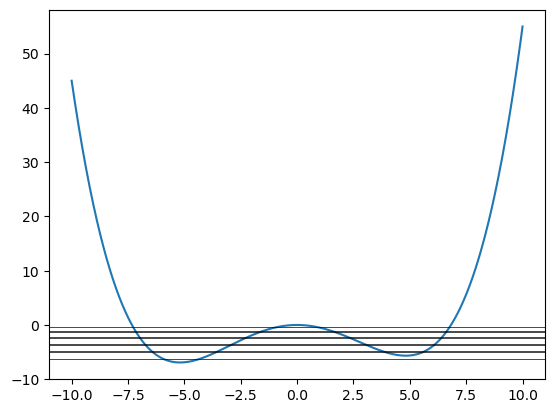

In [89]:
fig = plt.figure()
plt.plot(x, V)
for i in range(10):
    plt.axhline(eigs[i], color='black', linewidth=0.5)
plt.show()

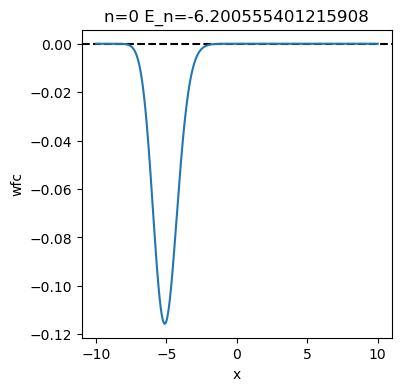

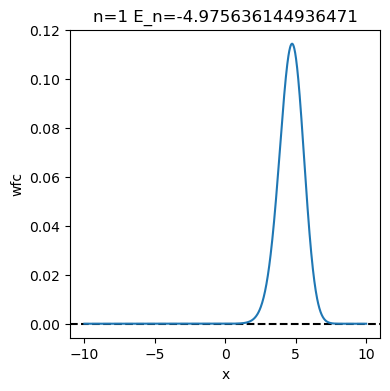

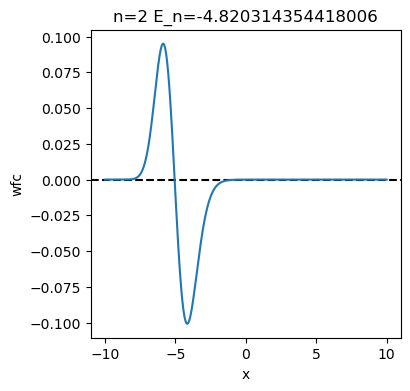

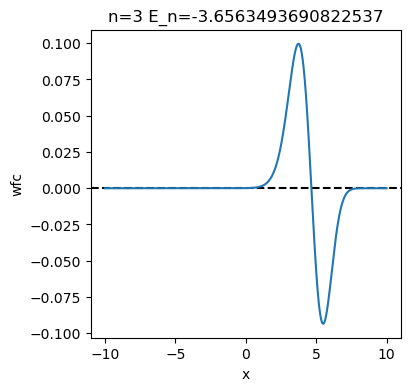

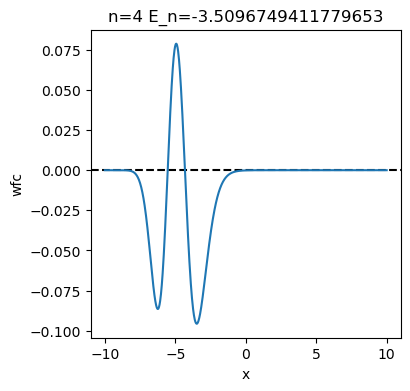

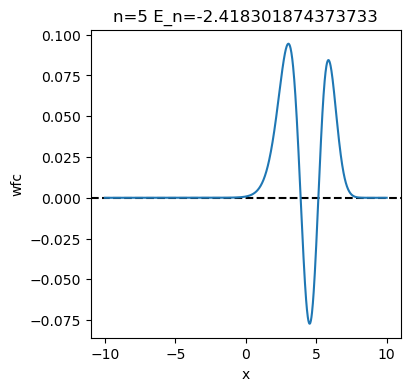

In [90]:
for i in range(6):
    fig = plt.figure(figsize=(4,4))
    plt.axhline(0, color='black', linestyle='--')
    plt.plot(x, eigv[:,i])
    plt.title(f'n={i} E_n={eigs[i]}')
    plt.xlabel('x')
    plt.ylabel('wfc')
    plt.show()